In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import io
from google.colab import files
uploaded = files.upload()

Saving final2.csv to final2.csv


In [42]:
import sklearn


In [54]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score

In [16]:
import matplotlib.pyplot as plt
from matplotlib import rcParams

rcParams['figure.figsize'] = 7,4

In [55]:
df = pd.read_csv('final2.csv')

In [56]:
df.head()

,Date,ExternalTemp1,Humidity,Pressure,Temperature
0,8/20/2022 2:03,19.4,81,1008.100,17.9
1,8/20/2022 2:13,19.4,81,1008.001,17.9
2,8/20/2022 2:23,19.3,81,1007.877,17.9
3,8/20/2022 2:33,19.3,81,1007.949,17.8
4,8/20/2022 2:53,19.3,81,1007.808,18.0


In [58]:
df['Date'] = pd.to_datetime(df['Date'])

In [59]:
df.dropna(inplace=True)

In [60]:
scaler = StandardScaler()
X = scaler.fit_transform(df.iloc[:, 1:])

In [61]:
sil_scores = []
for n_clusters in range(2, 11):
    kmeans = KMeans(n_clusters=n_clusters)
    cluster_labels = kmeans.fit_predict(X)
    sil_scores.append(silhouette_score(X, cluster_labels))
optimal_n_clusters = np.argmax(sil_scores) + 2

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: F

In [62]:
kmeans = KMeans(n_clusters=optimal_n_clusters)
y_pred = kmeans.fit_predict(X)

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


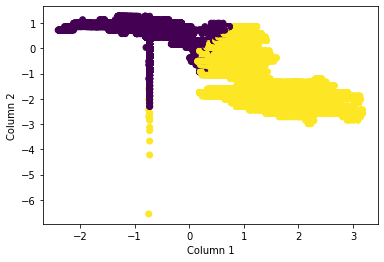

In [63]:
plt.scatter(X[:, 0], X[:, 1], c=y_pred)
plt.xlabel('Column 1')
plt.ylabel('Column 2')
plt.show()

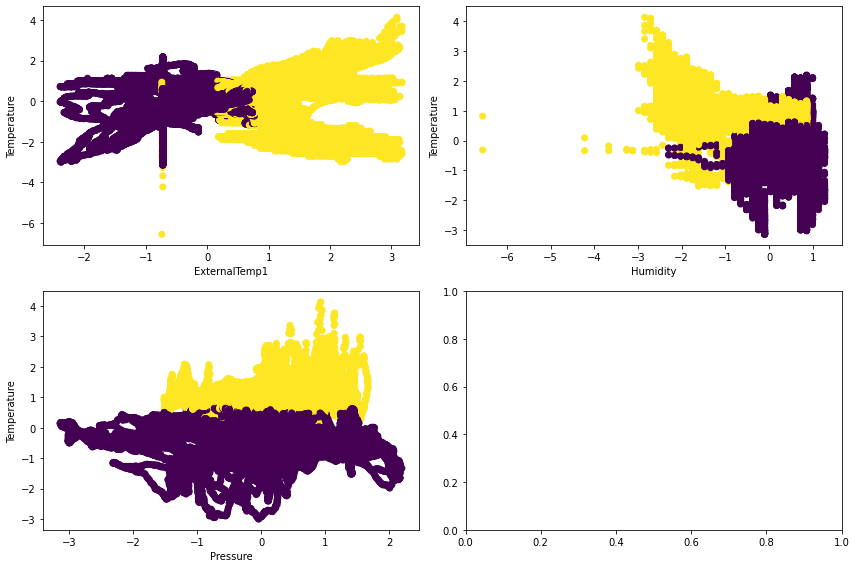

In [64]:
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(12, 8))
axs = axs.ravel()
for i in range(X.shape[1]):
    for j in range(i + 1, X.shape[1]):
        axs[i].scatter(X[:, i], X[:, j], c=y_pred)
        axs[i].set_xlabel(df.columns[i + 1])
        axs[i].set_ylabel(df.columns[j + 1])
plt.tight_layout()
plt.show()